**Question :**

In driver_data.csv , you are given a dataset of delivery fleet driver data. For each driver we have two features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit. 

Run the K-Means algorithm on this dataset and find the optimal number of clusters. What insights can you gather from these clusters? 

Perform Agglomerative clustering on the same dataset with an appropriate number of clusters. Plot the dendrogram. 
Compare the results from your K-Means model and your Hierarchical clustering model using silhouette scores. Which model is superior? 

Document your work and explain your reasoning. (Submit the ipynb and html file)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples,silhouette_score
import datetime
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
from scipy.cluster.hierarchy import dendrogram,linkage

In [2]:
df = pd.read_csv('driver_data.csv')

In [3]:
df

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [4]:
df.duplicated().sum()

163

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Distance_Feature    0
Speeding_Feature    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Distance_Feature  3837 non-null   float64
 1   Speeding_Feature  3837 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 89.9 KB


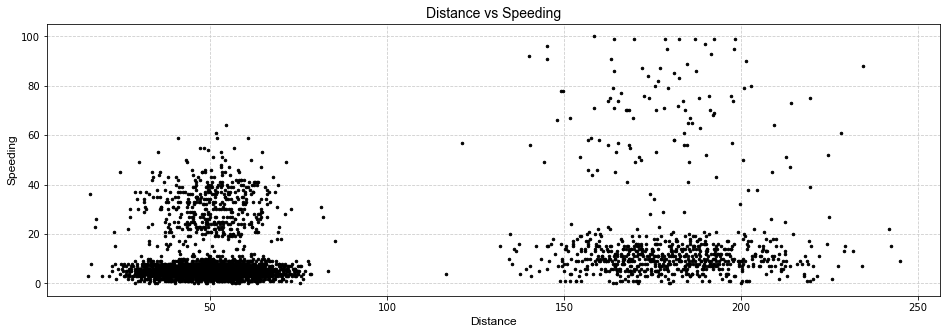

In [9]:
# Plot Data
rcParams['figure.figsize'] = 16,5
_ = plt.plot(df['Distance_Feature'],df['Speeding_Feature'], linestyle=None,linewidth=0,marker='.',markersize=5,color='black')
_ = plt.title('Distance vs Speeding',family='Arial',fontsize=14)
_ = plt.grid(which='major', color="#cccccc", linestyle='--')
_ = plt.xlabel('Distance',family='Arial',fontsize=12)
_ = plt.ylabel('Speeding',family='Arial',fontsize=12)
plt.show()

In [10]:
df_clustering = df[['Distance_Feature','Speeding_Feature']]
df_clustering.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [11]:
df.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [12]:
from sklearn.preprocessing import StandardScaler
std_scale= StandardScaler()

In [13]:
for i in df.columns:
    df[i]= std_scale.fit_transform(df[i].values.reshape(-1,1))

In [14]:
df.head()

,Distance_Feature,Speeding_Feature
0,-0.106583,1.223187
1,-0.451621,1.008000
2,-0.230140,1.151458
3,-0.393347,0.792813
4,-0.413817,1.008000


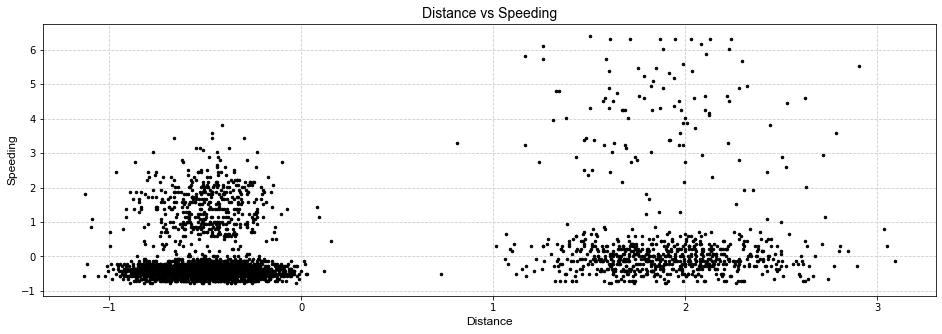

In [32]:
# Plot Data
rcParams['figure.figsize'] = 16,5
_ = plt.plot(df['Distance_Feature'],df['Speeding_Feature'], linestyle=None,linewidth=0,marker='.',markersize=5,color='black')
_ = plt.title('Distance vs Speeding',family='Arial',fontsize=14)
_ = plt.grid(which='major', color="#cccccc", linestyle='--')
_ = plt.xlabel('Distance',family='Arial',fontsize=12)
_ = plt.ylabel('Speeding',family='Arial',fontsize=12)
plt.show()

In [15]:
x = df.iloc[:,:].values
x

array([[-0.10658318,  1.22318721],
       [-0.45162133,  1.00800033],
       [-0.2301404 ,  1.15145825],
       ...,
       [ 1.73146881,  0.07552385],
       [ 1.82791721, -0.42657887],
       [ 1.67835764, -0.13966303]])

# Classical Elbow method

In [16]:
# we are going to compute the with in cluster sum of squares for 10
# different numbers of clusters
wscc = []
for i in range (1,11):
    # fit the KMeans algorithm to our data x
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=42)
    kmeans.fit(x)
    wscc.append(kmeans.inertia_)

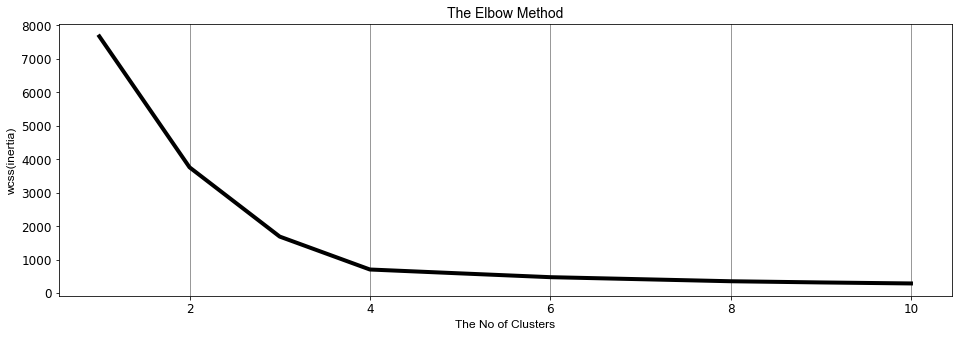

In [17]:
# Plot the elbow Method
_ = plt.plot(range(1,11),wscc,linewidth = 4, color='black')
_ = plt.title('The Elbow Method',family='Arial',fontsize=14, color='black')
_ = plt.grid(which='both', color="black", axis='x', alpha=0.5)
_ = plt.xlabel('The No of Clusters',family='Arial',fontsize=12,color='black')
_ = plt.ylabel('wcss(inertia)',family='Arial',fontsize=12,color='black')
_ = plt.xticks(fontsize=12,color='black')
_ = plt.yticks(fontsize=12, color ='black')

plt.show()

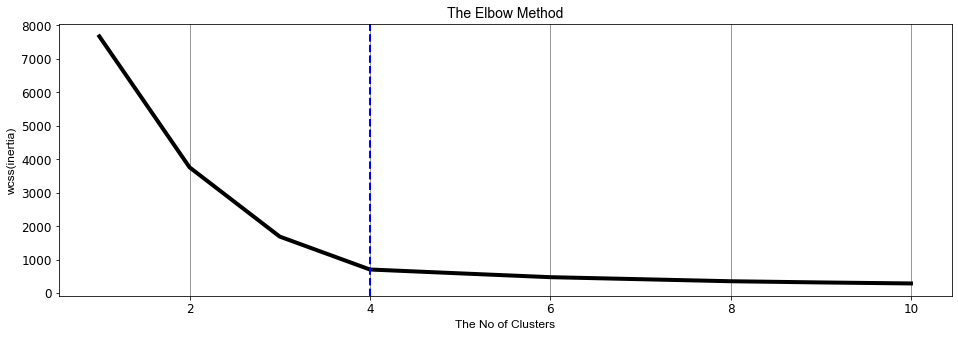

In [19]:
_ = plt.plot(range(1,11),wscc,linewidth = 4, color='black')
_ = plt.title('The Elbow Method',family='Arial',fontsize=14, color='black')
_ = plt.grid(which='both', color="black", axis='x', alpha=0.5)
_ = plt.xlabel('The No of Clusters',family='Arial',fontsize=12,color='black')
_ = plt.ylabel('wcss(inertia)',family='Arial',fontsize=12,color='black')
_ = plt.xticks(fontsize=12,color='black')
_ = plt.yticks(fontsize=12, color ='black')

_ = plt.axvline(x = 4, linewidth=2, color='blue', linestyle='--')
plt.show()

# Solution #2. Silhoutte score 

In [20]:
# A more precise approch is to use the silhoutte score, which is the mean of silhoutte cofficent
# over all instances. An instance's silhoutte cofficent is equal to (b-a)/max(a,b), where a is the 
# mean distance to the other instances in the same cluster

In [21]:
silhouette_score(x,kmeans.labels_)

0.35567442249835407

In [22]:
for i in range(2,11):
    kmeans_per_k = KMeans(n_clusters=i, random_state=42).fit(x).labels_
    print(f'silhouette score for k = {i} is {silhouette_score(x,kmeans_per_k)}')    

silhouette score for k = 2 is 0.7003500799401434
silhouette score for k = 3 is 0.7579467243203868
silhouette score for k = 4 is 0.780078705747875
silhouette score for k = 5 is 0.7328068762424256
silhouette score for k = 6 is 0.7290956938629217
silhouette score for k = 7 is 0.664640448344716
silhouette score for k = 8 is 0.3608225101917371
silhouette score for k = 9 is 0.36017143995097806
silhouette score for k = 10 is 0.35567442249835407


In [23]:
# Create a list of hypothetical senerious for different number of clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x) for k in range(1,10)]
silhouette_scores = [silhouette_score(x, model.labels_) for model in kmeans_per_k[1:]]

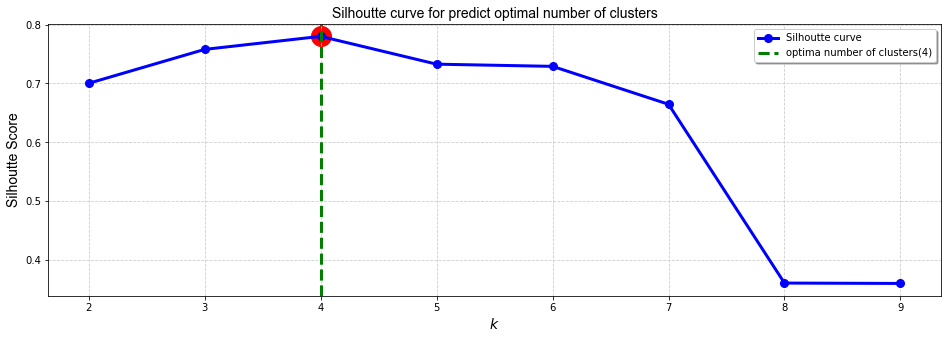

In [24]:
# Plot the Silhoutte score Graph
# Plot Data
rcParams['figure.figsize'] = 16,5
_ = plt.plot(range(2,10), silhouette_scores, "bo-",  linewidth = 3, color='blue', markersize=8, label='Silhoutte curve')
_ = plt.title('Silhoutte curve for predict optimal number of clusters',family='Arial',fontsize=14)
_ = plt.grid(which='major', color="#cccccc", linestyle='--')
_ = plt.xlabel('$k$',family='Arial',fontsize=14)
_ = plt.ylabel('Silhoutte Score',family='Arial',fontsize=14)

# Calculate the optimal number of cluster
k = np.argmax(silhouette_scores)+2

# Draw the vertical line to mark optimal number of clusters
_ = plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='optima number of clusters({})'.format(k))
_ = plt.scatter(k, silhouette_scores[k-2], c='red', s = 400)
_ = plt.legend(shadow=True)
_ = plt.show()

In [33]:
print('The optimal number of cluster for a given data is {}.'.format(k))

The optimal number of cluster for a given data is 4.


In [34]:
number_of_clusters = 4

In [35]:
# Plotting functions (have to be placed in helper funcion)
def plot_decision_boundaries(clusterer, x, resolution = 1000, show_centroids=True, show_xlabels =True, show_ylabels=True):
    mins = x.min(axis = 0) - 0.1
    maxs = x.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    z = clusterer.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    plt.contourf(z,extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(z,extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidth=1, colors='k')
    plot_data(x)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel("$x_1$",fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
        
def plot_data(x):
    plt.plot(x[:, 0], x[:, 1],"k.", markersize=2)
    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max()/10]
    plt.scatter(centroids[:, 0], centroids[:,1], marker='o', s=50, linewidth=8, color=circle_color, zorder=10,alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:,1], marker='x', s=70, linewidth=50, color=cross_color, zorder=11,alpha=1)

<ipython-input-35-2079933dcf0a>:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(z,extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidth=1, colors='k')


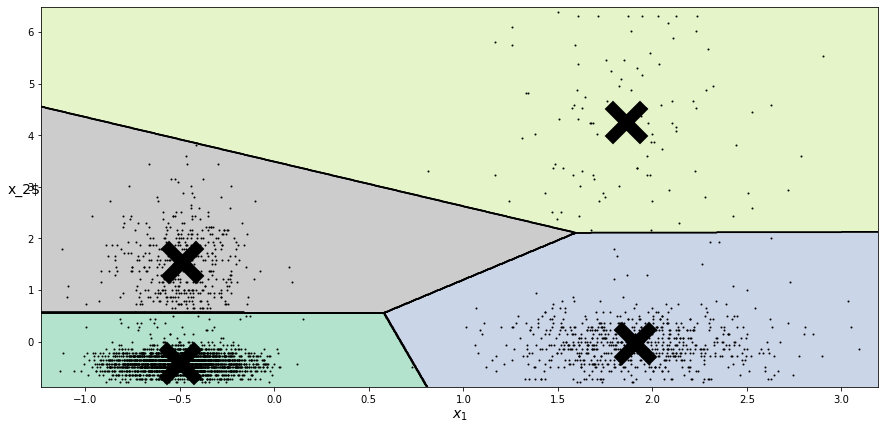

In [36]:
plt.figure(figsize=(15,7))
plot_decision_boundaries(kmeans_per_k[number_of_clusters-1], x)
plt.show()

# Agglomerative Clustering

In [37]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

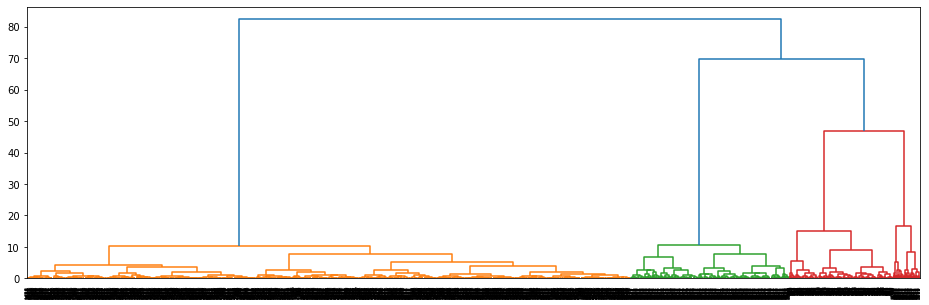

In [38]:
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

In [64]:
# Perform the actual Clustering
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'ward')

In [65]:
predict = model.fit_predict(x)

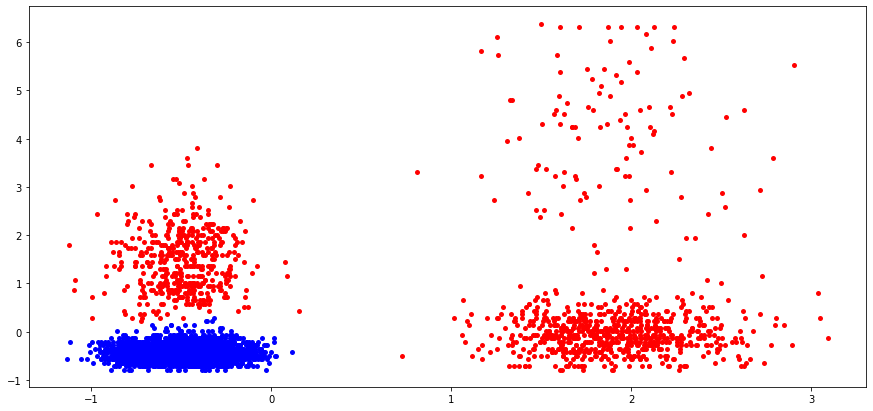

In [44]:
plt.figure(figsize=(15,7))
plt.scatter(x[predict==0,0], x[predict==0,1], s=100, linewidth=0,marker='.', c='red',)
plt.scatter(x[predict==1,0], x[predict==1,1], s=100, linewidth=0,marker='.', c='blue')

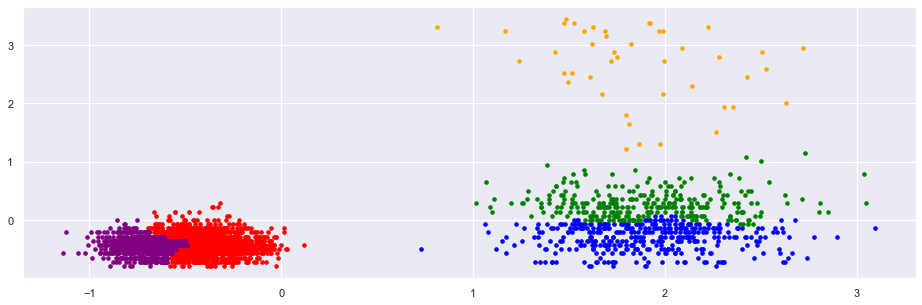

In [55]:
plt.scatter(x[labels==0, 0], x[labels==0, 1], s=50, marker='.', color='red')
plt.scatter(x[labels==1, 0], x[labels==1, 1], s=50, marker='.', color='blue')
plt.scatter(x[labels==2, 0], x[labels==2, 1], s=50, marker='.', color='green')
plt.scatter(x[labels==3, 0], x[labels==3, 1], s=50, marker='.', color='purple')
plt.scatter(x[labels==4, 0], x[labels==4, 1], s=50, marker='.', color='orange')
plt.show()

In [56]:
labels = model.labels_

In [57]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
pred = model.fit_predict(df)

<IPython.core.display.Javascript object>

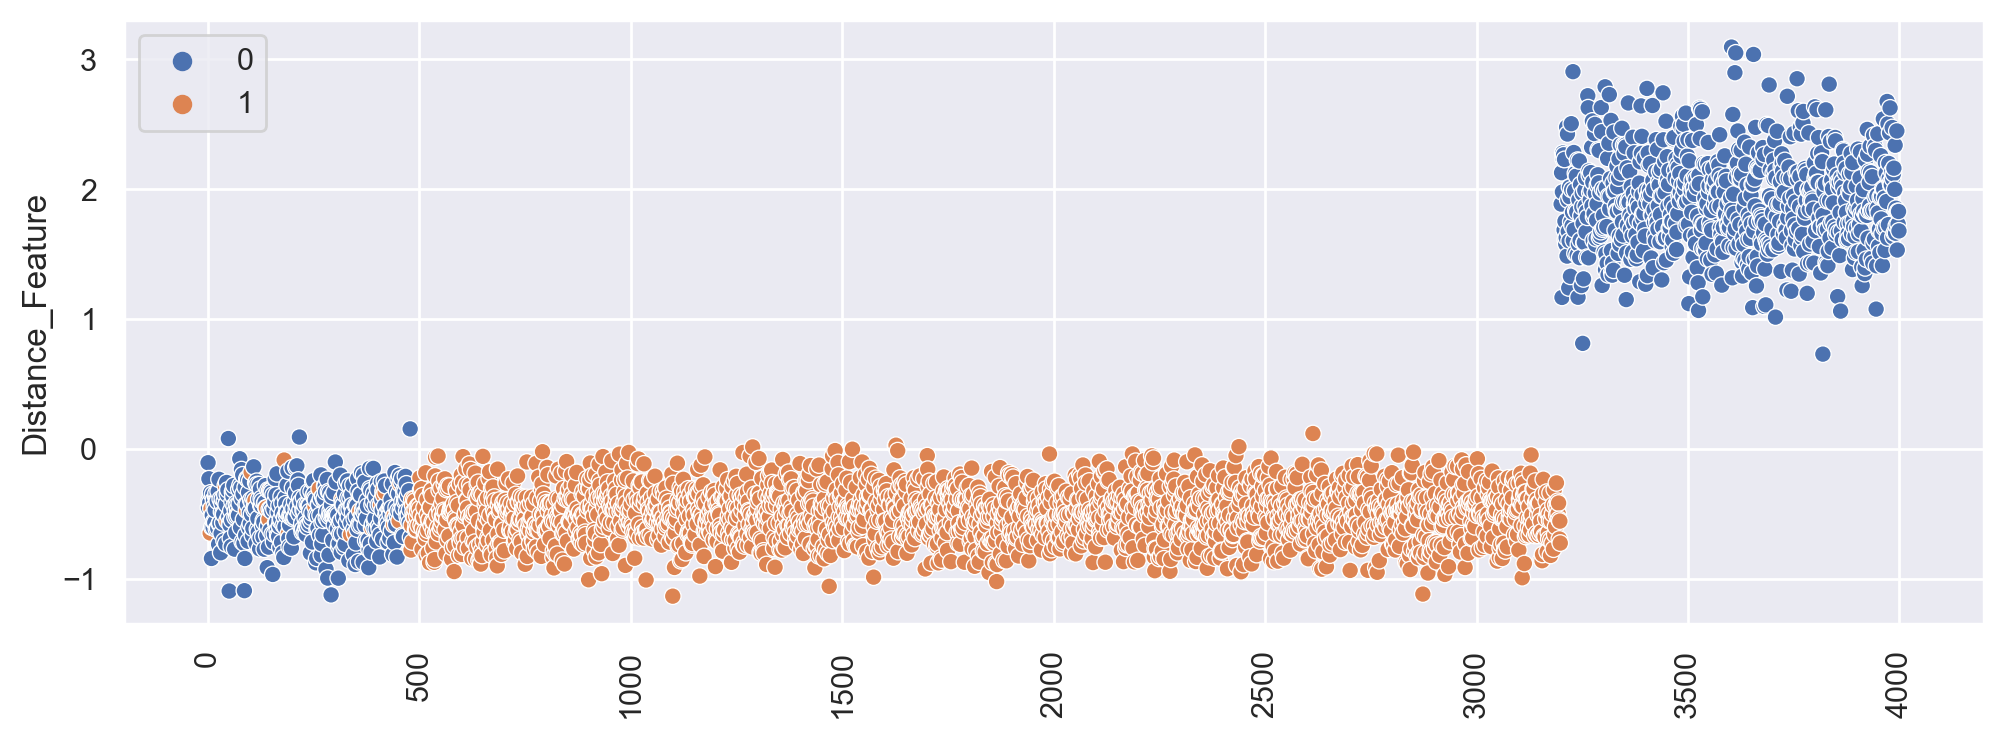

In [59]:
plt.figure(figsize=(12,4),dpi=200);
sns.scatterplot(data=df,x=df.index,y='Distance_Feature',hue=pred);
plt.xticks(rotation=90);

In [60]:
for i in range(2,11):
    labels = AgglomerativeClustering(n_clusters=i).fit(df).labels_
    print(f'silhouette score for k = {i} is {silhouette_score(x,labels)}')    

silhouette score for k = 2 is 0.631588806386496
silhouette score for k = 3 is 0.751129274977258
silhouette score for k = 4 is 0.7744761886348343
silhouette score for k = 5 is 0.7717010089322597
silhouette score for k = 6 is 0.7391949157827792
silhouette score for k = 7 is 0.6656449715131482
silhouette score for k = 8 is 0.32740528696222226
silhouette score for k = 9 is 0.3252644212486938
silhouette score for k = 10 is 0.32433852815185654


In [61]:
# Create a list of hypothetical senerious for different number of clusters
agglo_per_k = [AgglomerativeClustering(n_clusters=k).fit(x) for k in range(1,10)]
silhouette_scores1 = [silhouette_score(x, model.labels_) for model in agglo_per_k[1:]]

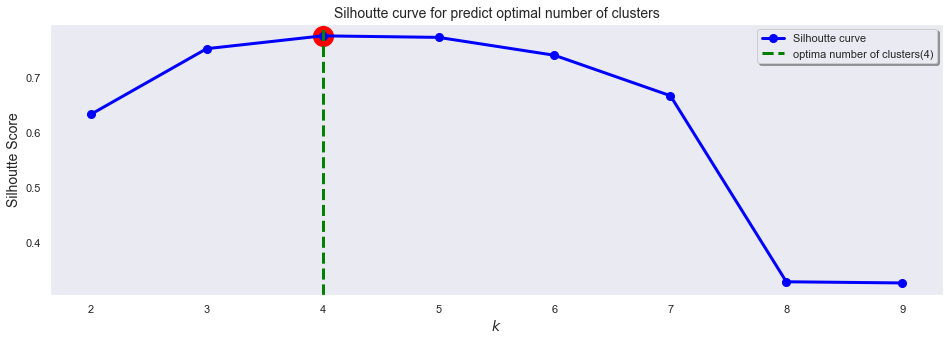

In [62]:
# Plot the Silhoutte score Graph
# Plot Data
rcParams['figure.figsize'] = 16,5
_ = plt.plot(range(2,10), silhouette_scores1, "bo-",  linewidth = 3, color='blue', markersize=8, label='Silhoutte curve')
_ = plt.title('Silhoutte curve for predict optimal number of clusters',family='Arial',fontsize=14)
_ = plt.grid(which='major', color="#cccccc", linestyle='--')
_ = plt.xlabel('$k$',family='Arial',fontsize=14)
_ = plt.ylabel('Silhoutte Score',family='Arial',fontsize=14)

# Calculate the optimal number of cluster
k = np.argmax(silhouette_scores1)+2

# Draw the vertical line to mark optimal number of clusters
_ = plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='optima number of clusters({})'.format(k))
_ = plt.scatter(k, silhouette_scores1[k-2], c='red', s = 400)
_ = plt.legend(shadow=True)
_ = plt.show()

* When compare the silhoutee results of both K-Means model and Agglomerative Hierarchical clustering model giving same results of k=4.In this Dataset we can choose any of these two methods to decide the k value and by seeing above graphs we can understand the K value clearly.